## **Impurity Metrics**

* Gini
* Entropy

In [3]:
## Gini for Binary
## 2*p1*p2

n = 200
C1 = 198
C2 = 2
p1 = C1/n
p2 = C2/n

Gini = 2*p1*p2
Gini

0.0198

In [4]:
## Combined GINI

(2841 / 3537)*0.478 + (696/3537)*0.02

0.3878761662425785

### **Customer Churn**

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/customer_churn.csv')
df.head()

,CustomerId,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [6]:
df.drop(['CustomerId', 'Lastname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [7]:
## y = Churned
df['Churned'].value_counts()

,count
Churned,
0,6461
1,1639


                                             |          | [  0%]   00:00 -> (? left)


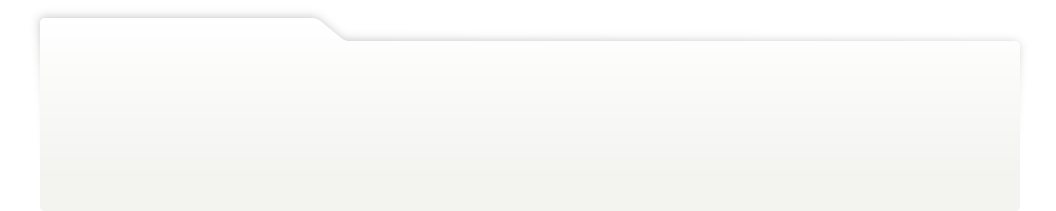
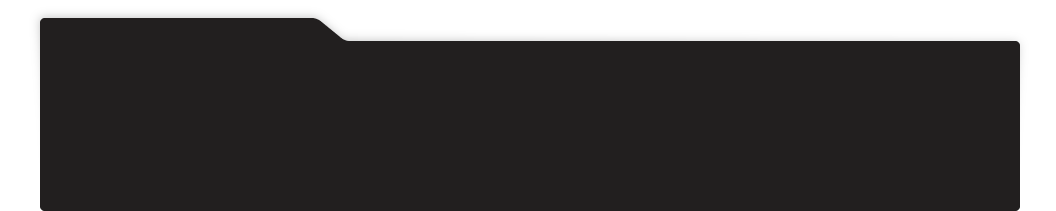
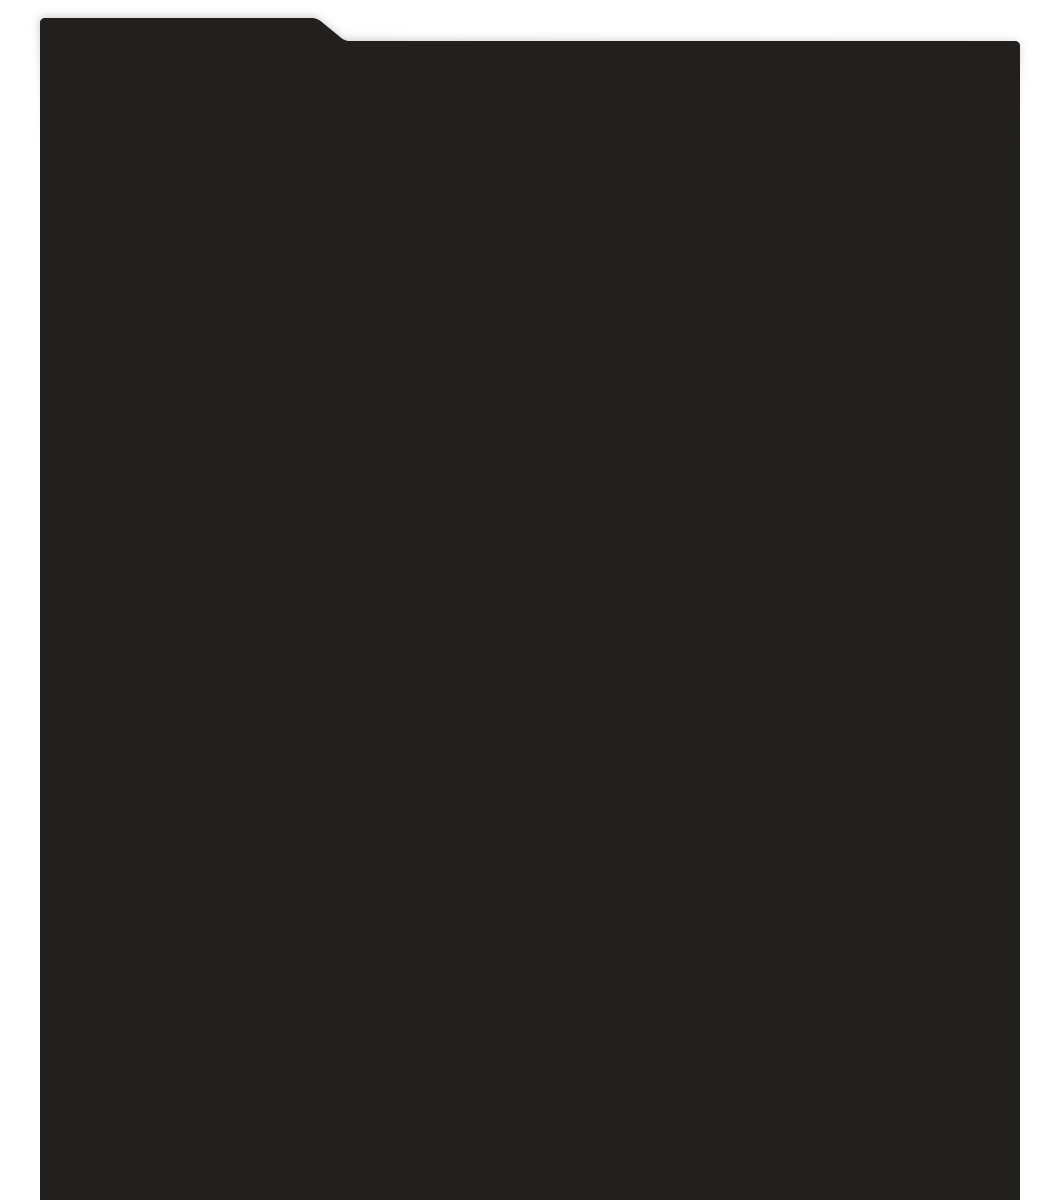
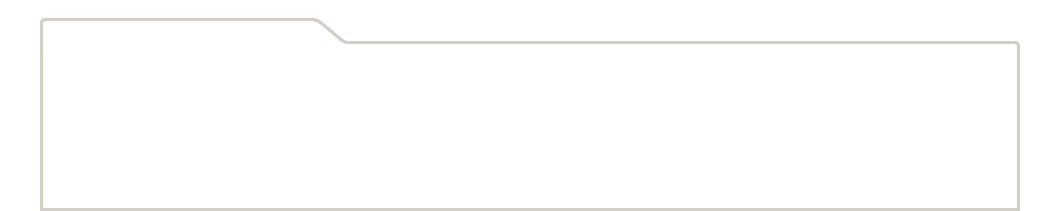
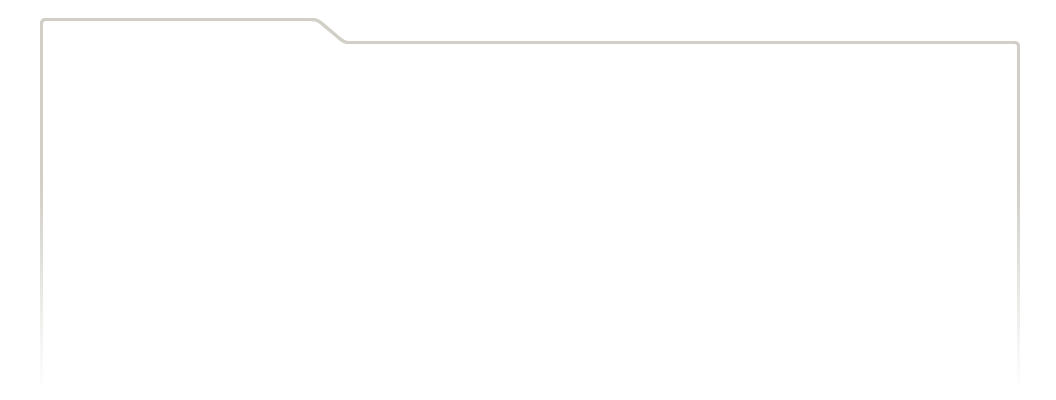
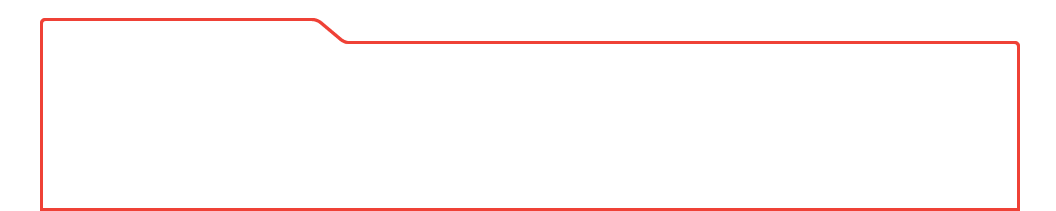
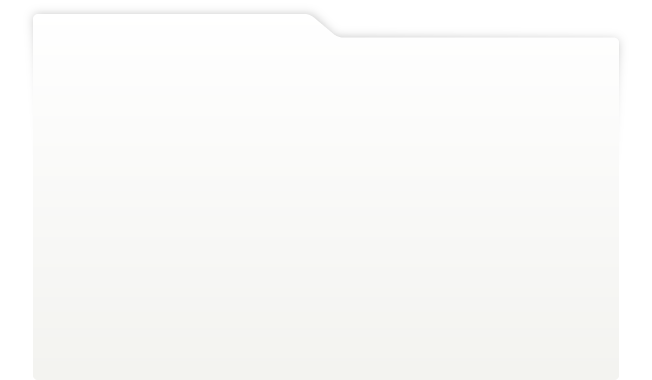
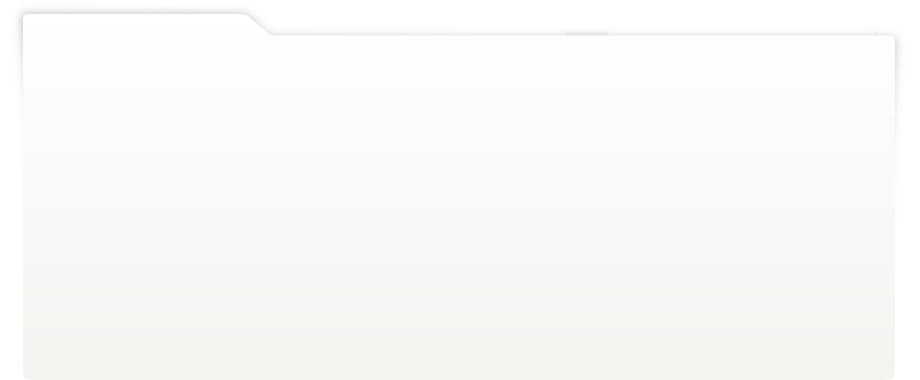
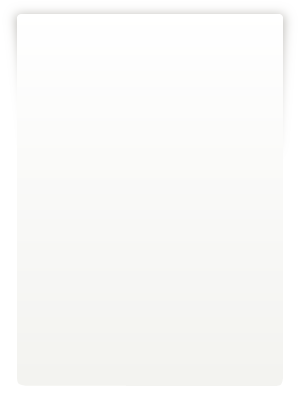
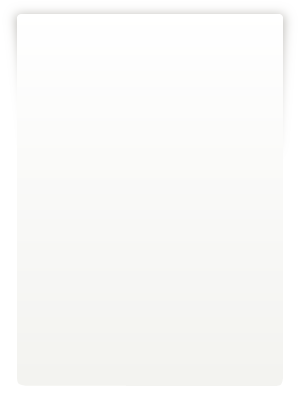
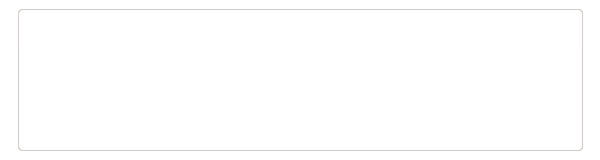
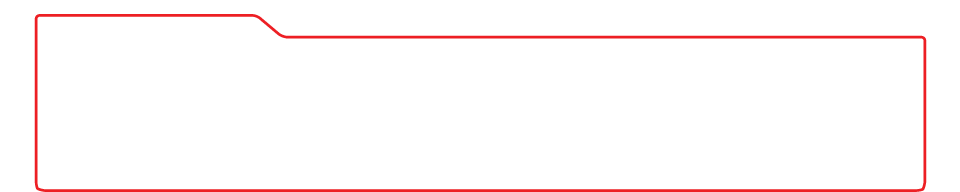
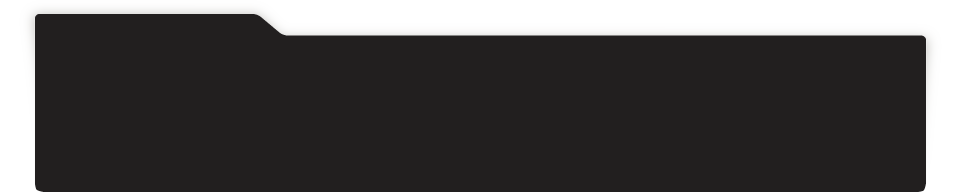
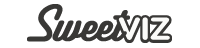
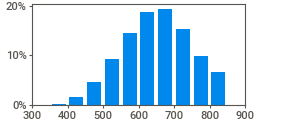
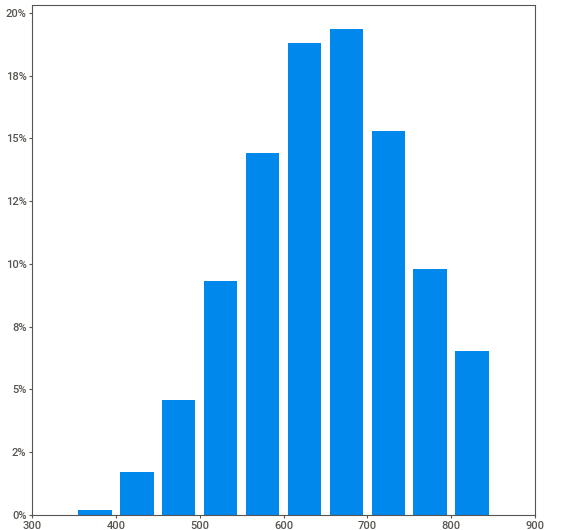
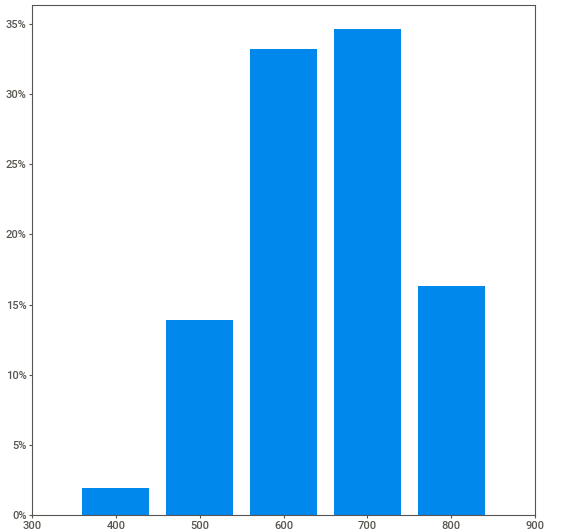
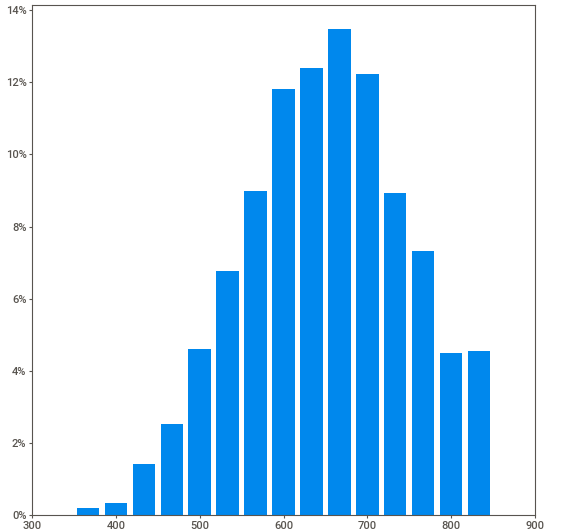
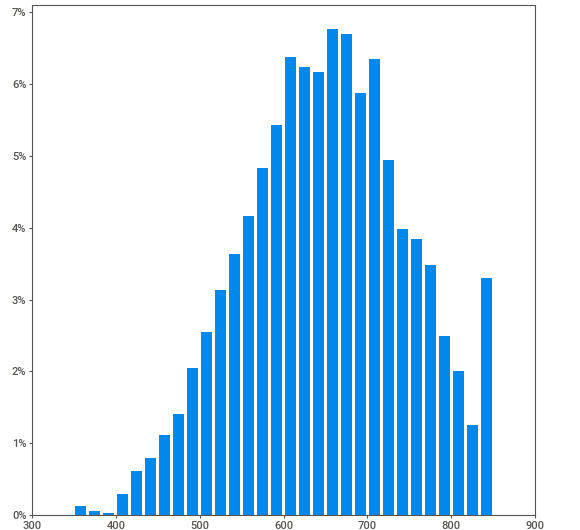
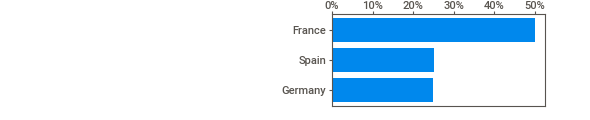
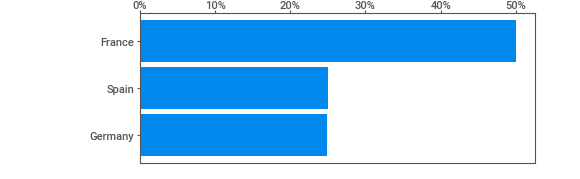
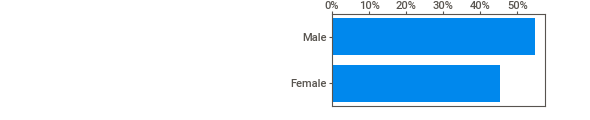
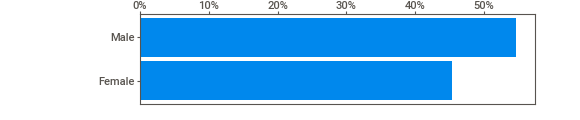
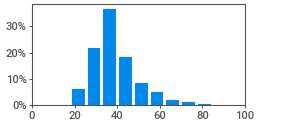
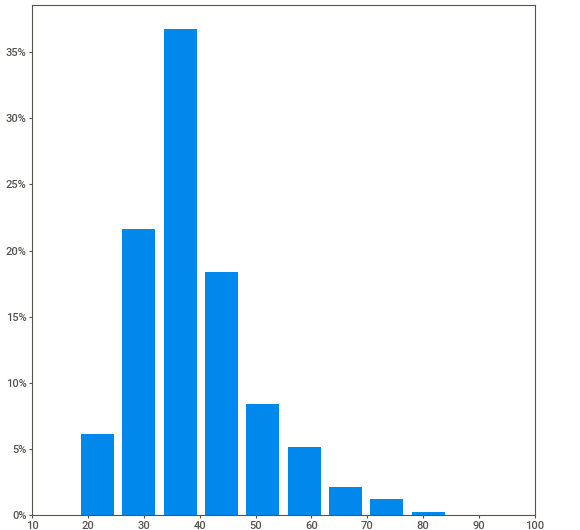
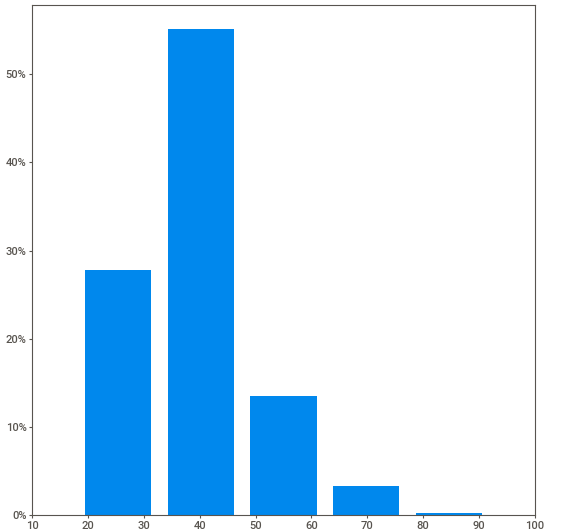
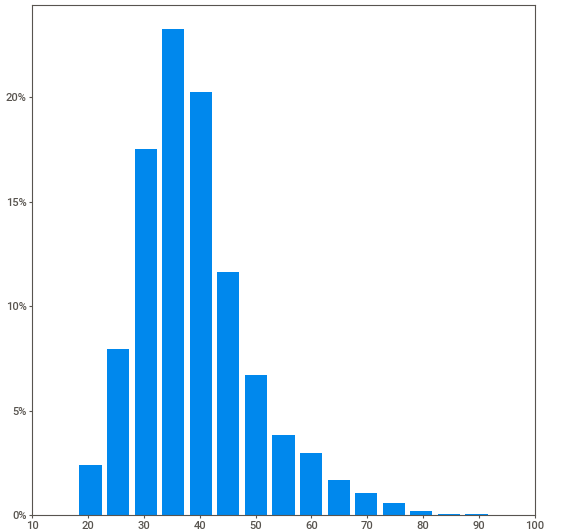
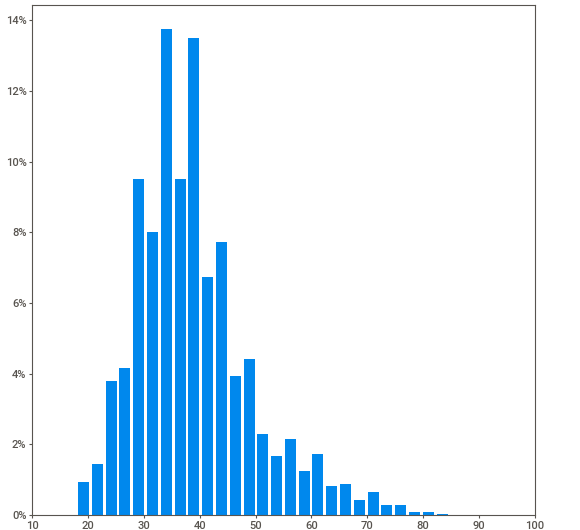
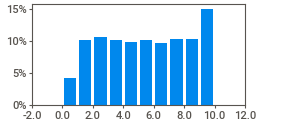
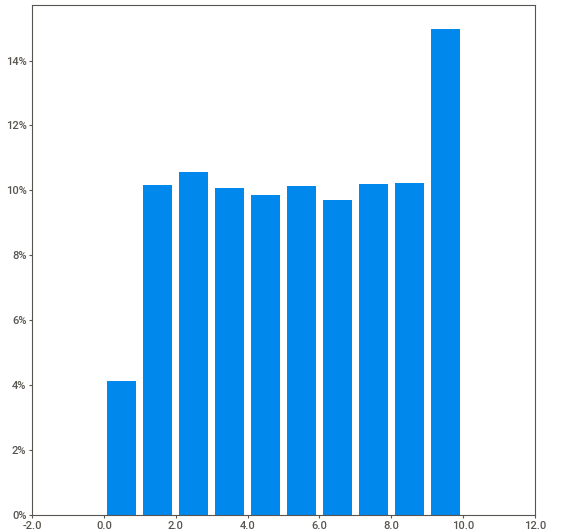
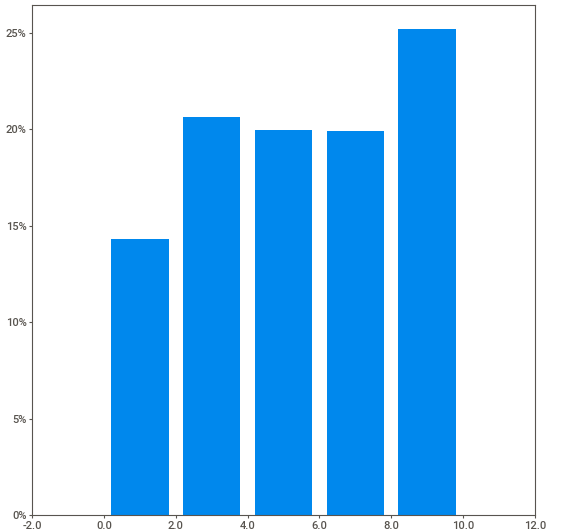
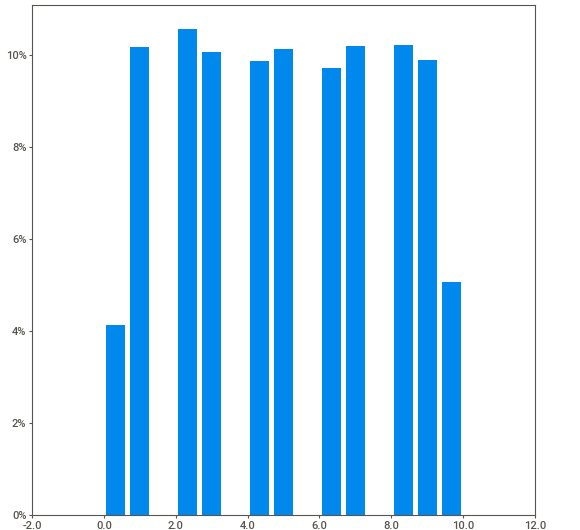
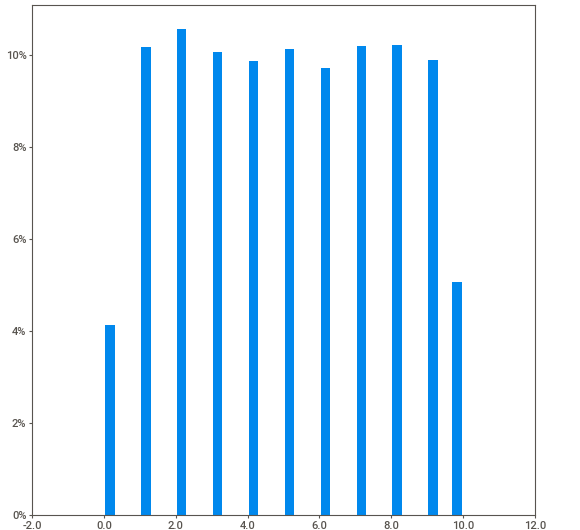
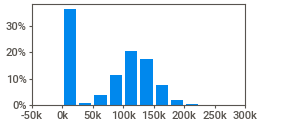
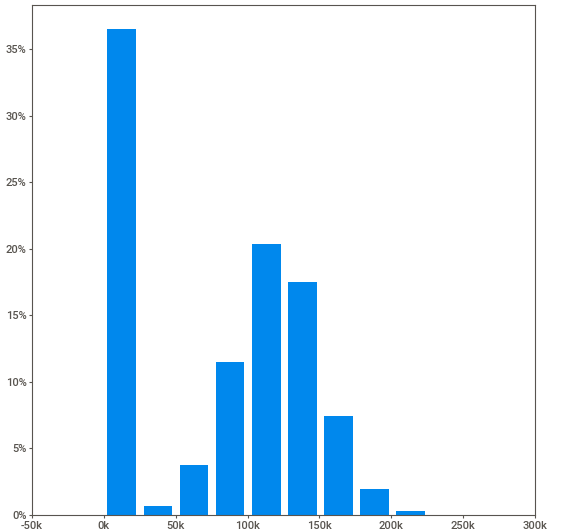
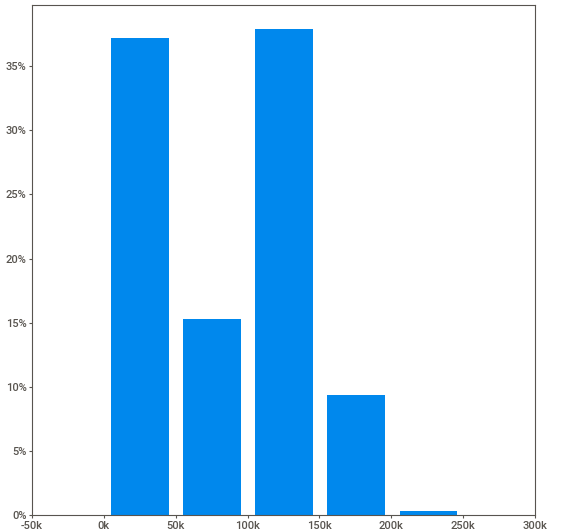
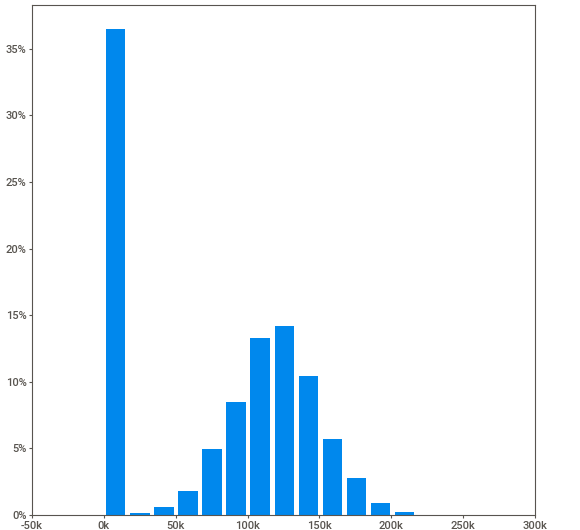
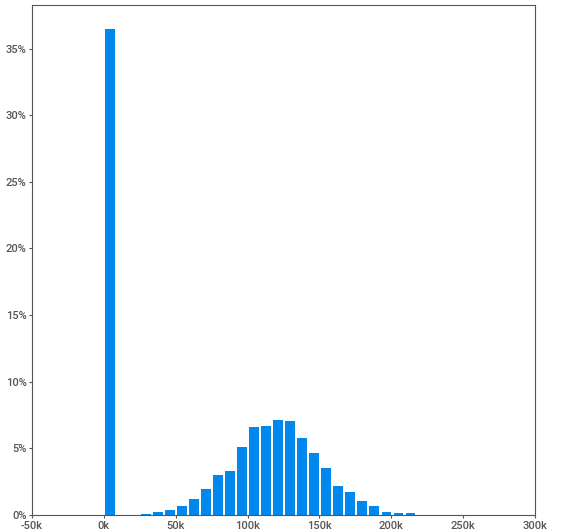
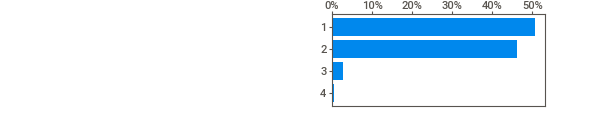
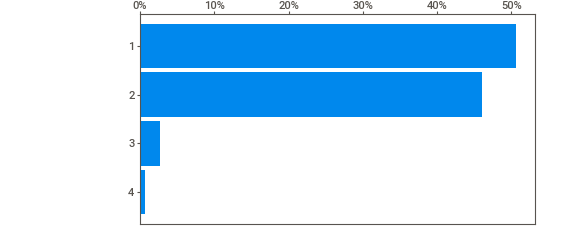
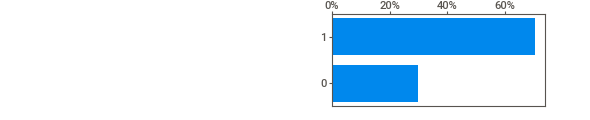
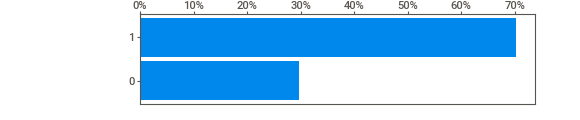
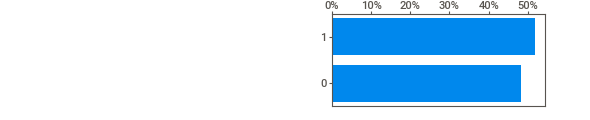
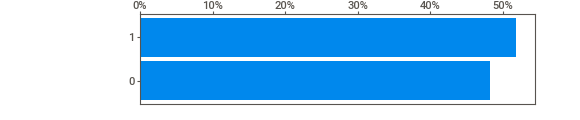
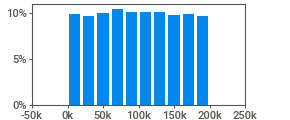
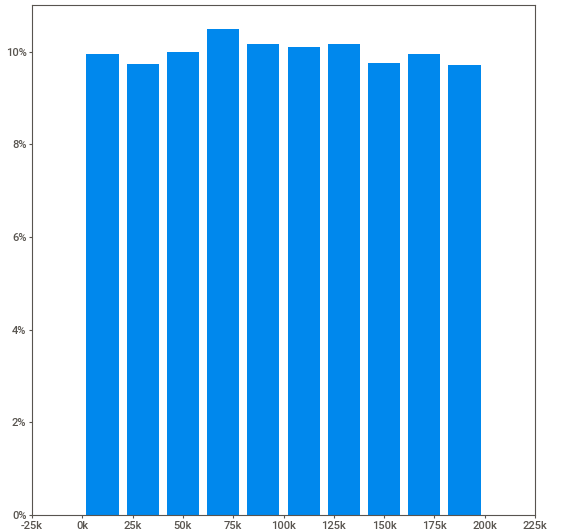
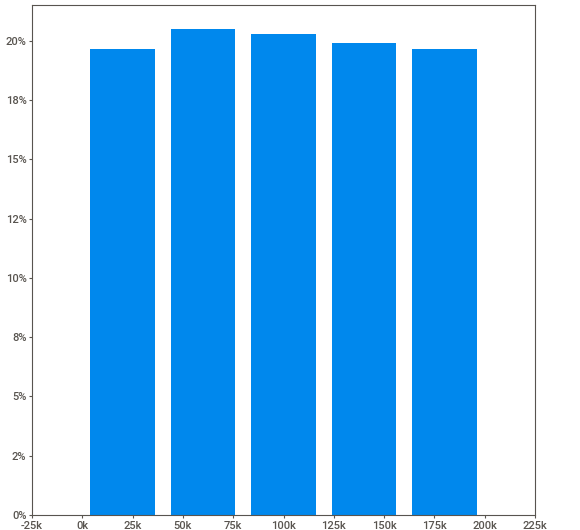
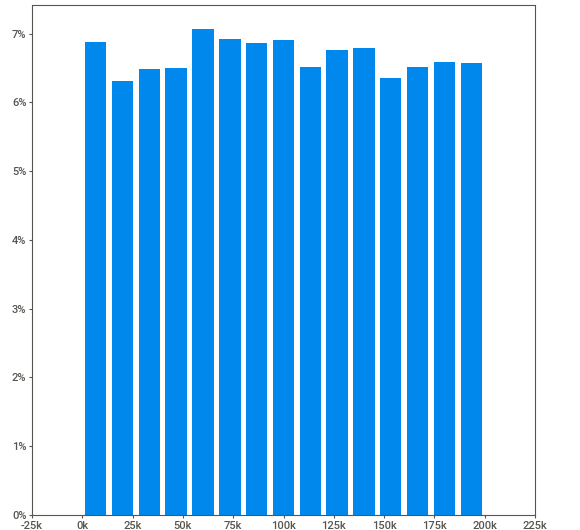
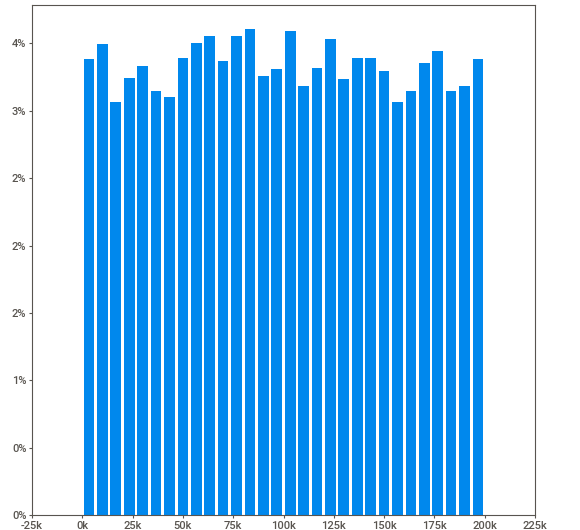
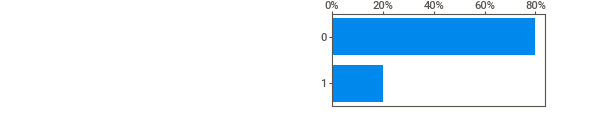
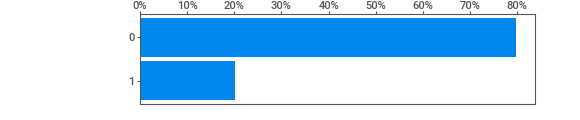
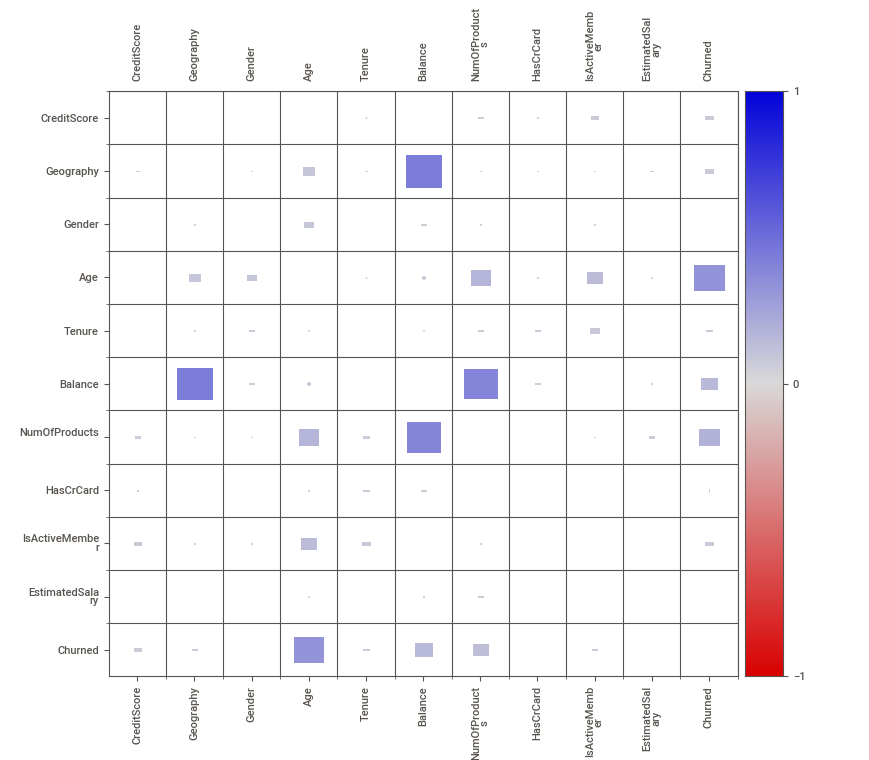
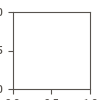

In [9]:
import sweetviz as sv

report = sv.analyze(df)
report.show_notebook()

In [10]:
## correlation measures linear strength (relationships)
## Age and Balance have the strongest LINEAR relationships with P(CHURN)

In [11]:
## encode
df = pd.get_dummies(df, drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,755,33,6,90560.30,2,1,1,42607.69,0,True,False,False
1,644,44,5,73348.56,1,1,0,157166.79,1,False,False,True
2,586,29,3,0.00,2,1,1,142238.54,0,False,False,True
3,590,60,6,147751.75,1,1,0,88206.04,1,False,False,False
4,732,42,2,118889.66,2,0,0,87422.15,0,True,False,False


In [12]:
## Create X and y
X = df.drop('Churned', axis = 1)
y = df['Churned']

In [13]:
## 80% and 20% random state = 13
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [16]:
## HOW TO DEAL WITH IMBALANCE
## Severe imbalance (< 0.05) requires some extra steps
y_train.value_counts()

,count
Churned,
0,5173
1,1307


In [17]:
## UNDERSAMPLING
## Select all churns: 1307
## Sample Non-churns: 1307

from imblearn.under_sampling import RandomUnderSampler

## instance
RandomUS = RandomUnderSampler()

## fit_resample method ONLY ON THE TRAINING SET (never the test)
X_train_US, y_train_US = RandomUS.fit_resample(X_train, y_train)

In [19]:
## fit the models on this data set (undersampled)
## model evaluation is done on the regular X_test, y_test
y_train_US.value_counts()

,count
Churned,
0,1307
1,1307


In [20]:
## Fraud
## 25000 - Non-Fraud
## 13    - Fraud

## 13 frauds, 13 non-frauds with UNDERSAMPLE
## Oversampling - Creating additional frauds (artificially) from the data

In [38]:
p1 = 25000/25013
p2 = 13/25013
2*p1*p2

0.0010389192430634506

In [21]:
## OVERSAMPLING WITH SYNTHETIC DATA
## 25000 - Non-Fraud
## 13    - Fraud  -  25000 Frauds
from imblearn.over_sampling import SMOTE

## instance
smote = SMOTE()

## fit resample on the TRAINING
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [22]:
y_train_SMOTE.value_counts()

,count
Churned,
0,5173
1,5173


In [23]:
## You have 3 different data sets (TRAINING)
## 1. X_train, y_train
## 2. X_train_US, y_train_US
## 3. X_train_SMOTE, y_train_SMOTE
## You can build different models on each

In [24]:
## Fit a decision tree with max_depth = 1 on X_train, y_train
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## instance
dt = DecisionTreeClassifier(max_depth = 1, random_state = 13)

## fit
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=13)

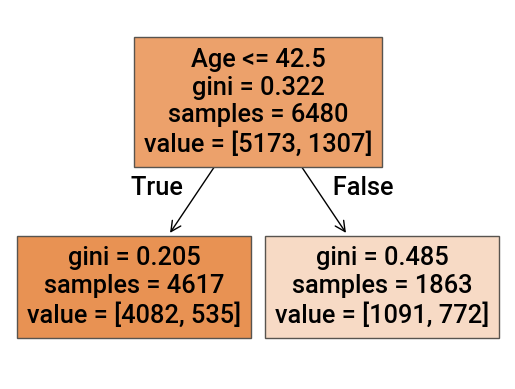

In [25]:
plot_tree(dt, feature_names=X_train.columns, filled = True);

In [27]:
## Gini on the ROOT
p1 = 5173 / 6480
p2 = 1307 / 6480

Gini = 2*p1*p2
Gini

0.32203127381496727

In [28]:
## Combined Gini
(4617/ 6480)*0.205 + (1863/6480)*0.485

0.2855

In [29]:
## impurity decrease
Gini - 0.2855

0.03653127381496729

In [30]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
993,589,50,5,144895.05,2,1,1,34941.23,True,False,False
802,719,47,9,116393.59,1,1,0,63051.32,False,True,False
4121,700,31,7,0.00,2,0,1,145151.96,False,True,True
3083,821,38,8,0.00,2,0,1,126241.40,False,True,False
6159,666,74,7,105102.50,1,1,1,46172.47,True,False,True


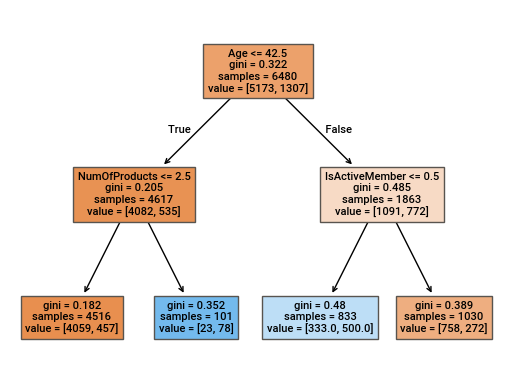

In [31]:
## fit a decision tree with max_depth = 2 on X_train, y_train and plot it
dt = DecisionTreeClassifier(max_depth = 2, random_state = 13)

## fit
dt.fit(X_train, y_train)

## plot
plot_tree(dt, feature_names=X_train.columns, filled = True);

In [33]:
X_test.iloc[0]
## node [4059, 457]
## prediction NOT CHURN
dt.predict(X_test)[0]

0

In [34]:
## What is the probability that this person churns?
## node [4059, 457]
457 / 4516

0.10119574844995571

In [36]:
dt.predict_proba(X_test)[:,1][0]

0.10119574844995571

In [39]:
## with imbalance
## terminal nodes won't have too many observations of the MINORITY class
## predictions and propensities will be biased
## improving the GINI will be harder

In [42]:
## ENTROPY
## impurity metric that works better with imbalance
## binary
## -(p1*np.log2(p1) + p2*np.log2(p2))
## node C1 = 12, C2 = 12
p1 = 12/24
p2 = 12/24

-(p1*np.log2(p1) + p2*np.log2(p2))

1.0

In [41]:
np.log2(0.5)

-1.0